Sveučilište u Zagrebu<br>
Fakultet elektrotehnike i računarstva

## Strojno učenje 2016./2017.

<a href="http://www.fer.unizg.hr/predmet/su">http://www.fer.unizg.hr/predmet/su</a>

### Laboratorijska vježba 2: Linearni diskriminativni modeli i logistička regresija

(c) 2015-2016 Jan Šnajder, Domagoj Alagić

<i>Verzija: 0.2</i> <br/>
<i>Zadnji put ažurirano: 26. listopada 2016.</i> 

Objavljeno: **26. listopada 2016.**<br>
Rok za predaju: U terminu vježbe u tjednu od **31. listopada 2016.**

### Upute

Druga laboratorijska vježba sastoji se od šest zadataka. Kako bi kvalitetnije, ali i na manje zamoran način usvojili gradivo ovog kolegija, potrudili smo se uključiti tri vrste zadataka: **1)** implementacija manjih algoritama, modela ili postupaka; **2)** eksperimenti s raznim modelima te njihovim hiperparametrima, te **3)** primjena modela na (stvarnim) podatcima. Ovim zadatcima pokrivamo dvije paradigme učenja: učenje izgradnjom (engl. *learning by building*) i učenje eksperimentiranjem (engl. *learning by experimenting*).

U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [1]:
# Učitaj osnovne biblioteke...
import numpy as np
import scipy as sp
import sklearn
import mlutils
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Zadatci

### 1. Linearna regresija kao klasifikator

U prvoj laboratorijskoj vježbi koristili smo model linearne regresije za, naravno, regresiju. Međutim, model linearne regresije može se koristiti i za **klasifikaciju**. Iako zvuči pomalo kontraintuitivno, zapravo je dosta jednostavno. Naime, cilj je naučiti funkciju $f(\mathbf{x})$ koja za negativne primjere predviđa vrijednost $+1$, dok za pozitivne primjere predviđa vrijednost $-1$. U tom slučaju, funkcija $f(\mathbf{x})=0$ predstavlja granicu između klasa, tj. primjeri za koje vrijedi $h(\mathbf{x})\geq 0$ klasificiraju se kao pozitivni, dok se ostali klasificiraju kao negativni.

Klasifikacija pomoću linearne regresije implementirana je u razredu [`RidgeClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html). U sljedećim podzadatcima **istrenirajte** taj model na danim podatcima i **prikažite** dobivenu granicu između klasa. Pritom isključite regularizaciju ($\alpha = 0$, odnosno `alpha=0`). Također i ispišite **točnost** vašeg klasifikacijskog modela (smijete koristiti funkciju [`metrics.accuracy_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)). Skupove podataka vizualizirajte korištenjem pomoćne funkcije ``plot_clf_problem(X, y, h=None)`` koja je dostupna u našem paketu `mlutils` (`mlutils.py`). `X` i `y` predstavljaju ulazne primjere i oznake, dok `h` predstavlja funkciju predikcije modela. 

U ovom zadatku cilj je razmotriti kako se klasifikacijski model linearne regresije ponaša na linearno odvojim i neodvojim podatcima.


In [2]:
from sklearn.linear_model import LinearRegression, RidgeClassifier
from sklearn.metrics import accuracy_score

#### (a)

Prvo, isprobajte *ugrađeni* model na linearno odvojivom skupu podataka `seven` ($N=7$).

In [3]:
seven_X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
seven_y = np.array([1, 1, 1, 1, -1, -1, -1])

Accuracy: 1.0


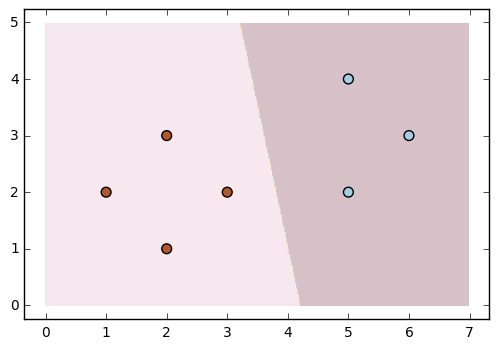

In [4]:
model = RidgeClassifier(alpha=0)
model.fit(seven_X, seven_y)
print "Accuracy:", accuracy_score(seven_y, model.predict(seven_X))
mlutils.plot_2d_clf_problem(seven_X, seven_y, h=model.predict)

Kako bi se uvjerili da se u isprobanoj implementaciji ne radi o ničemu doli o običnoj linearnoj regresiji, napišite kôd koji dolazi do jednakog rješenja korištenjem isključivo razreda [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). Funkciju za predikciju, koju predajete kao treći argument `h` funkciji `plot_2d_clf_problem`, možete definirati lambda-izrazom: `lambda x : model.predict(x) >= 0`.

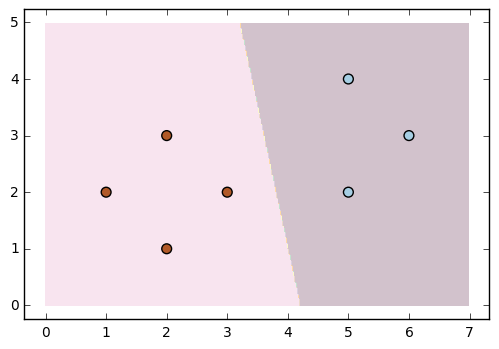

In [6]:
model = LinearRegression()
model.fit(seven_X, seven_y)
mlutils.plot_2d_clf_problem(seven_X, seven_y, h=lambda x: model.predict(x) >= 0)

**Q:** Kako bi bila definirana granica između klasa ako bismo koristili oznake klasa $0$ i $1$ umjesto $-1$ i $1$?

#### (b)

Probajte isto na linearno odvojivom skupu podataka `outlier` ($N=8$):

In [7]:
outlier_X = np.append(seven_X, [[12,8]], axis=0)
outlier_y = np.append(seven_y, -1)

Accuracy: 0.875


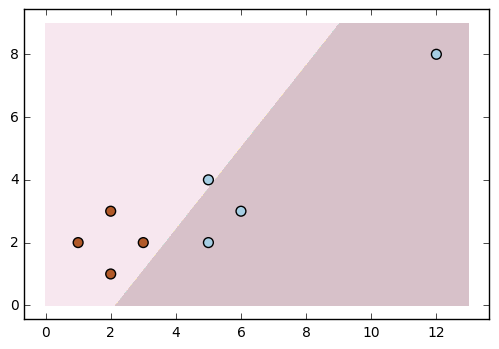

In [8]:
model = RidgeClassifier(alpha=0)
model.fit(outlier_X, outlier_y)
print "Accuracy:", accuracy_score(outlier_y, model.predict(outlier_X))
mlutils.plot_2d_clf_problem(outlier_X, outlier_y, h=model.predict)

**Q:** Zašto model ne ostvaruje potpunu točnost iako su podatci linearno odvojivi?

#### (c)

Završno, probajte isto na linearno neodvojivom skupu podataka `unsep` ($N=8$):

In [9]:
unsep_X = np.append(seven_X, [[2,2]], axis=0)
unsep_y = np.append(seven_y, -1)

Accuracy: 0.875


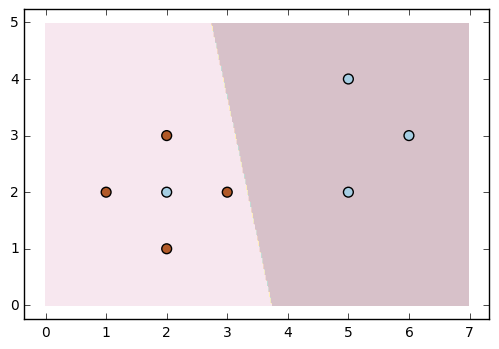

In [10]:
model = RidgeClassifier(alpha=0)
model.fit(unsep_X, unsep_y)
print "Accuracy:", accuracy_score(unsep_y, model.predict(unsep_X))
mlutils.plot_2d_clf_problem(unsep_X, unsep_y, h=model.predict)

**Q:** Očito je zašto model nije u mogućnosti postići potpunu točnost na ovom skupu podataka. Međutim, smatrate li da je problem u modelu ili u podacima? Zašto?

### 2. Višeklasna klasifikacija

Postoji više načina kako se binarni klasifikatori mogu se upotrijebiti za višeklasnu klasifikaciju. Najčešće se koristi shema tzv. **jedan-naspram-ostali** (engl. *one-vs-rest*, OVR), u kojoj se trenira po jedan klasifikator $h_j$ za svaku od $K$ klasa. Svaki klasifikator $h_j$ trenira se da razdvaja primjere klase $j$ od primjera svih drugih klasa, a primjer se klasificira u klasu $j$ za koju je $h_j(\mathbf{x})$ maksimalan.

Pomoću funkcije [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) generirajte slučajan dvodimenzijski skup podataka od tri klase i prikažite ga koristeći funkciju `plot_2d_clf_problem`. Radi jednostavnosti, pretpostavite da nema redundantnih značajki da je svaka od klasa "zbijena" u jednu grupu.

In [11]:
from sklearn.datasets import make_classification

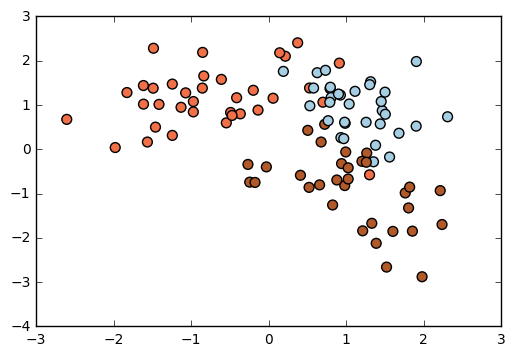

In [12]:
X, y = make_classification(n_features=2, n_redundant=0, n_classes=3, n_clusters_per_class=1)
mlutils.plot_2d_clf_problem(X, y)

Trenirajte tri binarna klasifikatora, $h_1$, $h_2$ i $h_3$ te prikažite granice između klasa (tri grafikona). Zatim definirajte $h(\mathbf{x})=\mathrm{argmax}_j h_j(\mathbf{x})$ i prikažite granice između klasa za taj model. Zatim se uvjerite da biste identičan rezultat dobili izravno primjenom modela `RidgeClassifier`, budući da taj model za višeklasan problem zapravo interno implementira shemu jedan-naspram-ostali.

**Q:** Alternativna shema je one-vs-one (OVO). Koja je prednost sheme OVR nad shemom OVO?

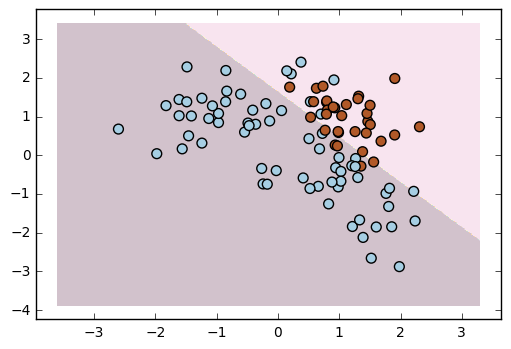

In [13]:
y_1 = y == 0
h_1 = RidgeClassifier(alpha=0)
h_1.fit(X, y_1)
mlutils.plot_2d_clf_problem(X, y_1, h=h_1.predict)

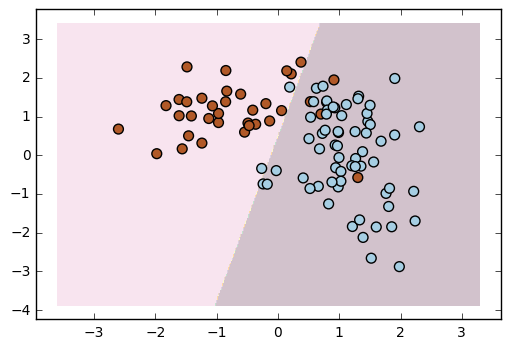

In [14]:
y_2 = y == 1
h_2 = RidgeClassifier(alpha=0)
h_2.fit(X, y_2)
mlutils.plot_2d_clf_problem(X, y_2, h=h_2.predict)

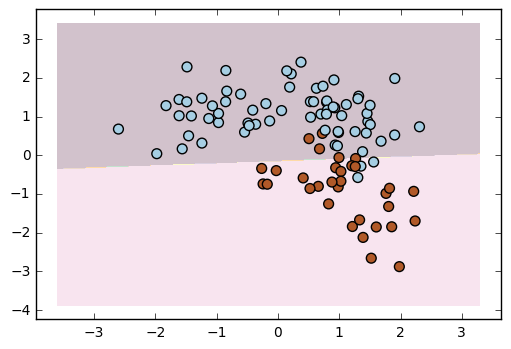

In [15]:
y_3 = y == 2
h_3 = RidgeClassifier(alpha=0)
h_3.fit(X, y_3)
mlutils.plot_2d_clf_problem(X, y_3, h=h_3.predict)

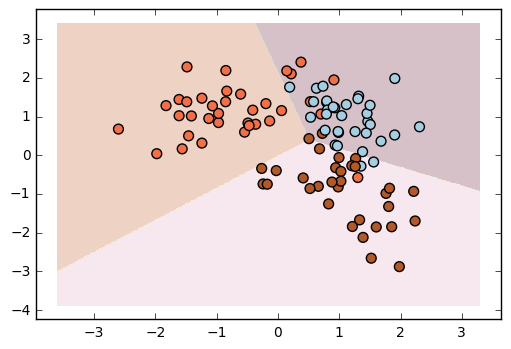

In [16]:
h = lambda x: np.argmax([h_1.decision_function(x), h_2.decision_function(x), h_3.decision_function(x)], axis=0)
mlutils.plot_2d_clf_problem(X, y, h=h)

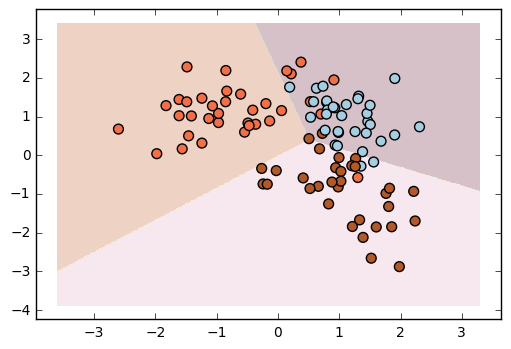

In [17]:
model = RidgeClassifier(alpha=0)
model.fit(X, y)
mlutils.plot_2d_clf_problem(X, y, h=model.predict)

### 3. Logistička regresija

Ovaj zadatak bavi se probabilističkim diskriminativnim modelom, **logističkom regresijom**, koja je, unatoč nazivu, klasifikacijski model.

Logistička regresija tipičan je predstavnik tzv. **poopćenih linearnih modela** koji su oblika: $h(\mathbf{x})=f(\mathbf{w}^\intercal\tilde{\mathbf{x}})$. Logistička funkcija za funkciju $f$ koristi tzv. **logističku** (sigmoidalnu) funkciju $\sigma (x) = \frac{1}{1 + \textit{exp}(-x)}$.

#### (a)

Definirajte logističku (sigmoidalnu) funkciju $\mathrm{sigm}(x)=\frac{1}{1+\exp(-\alpha x)}$ i prikažite je za $\alpha\in\{1,2,4\}$.

In [18]:
def sigm(x):
    return 1.0 / (1.0 + np.exp(-x))

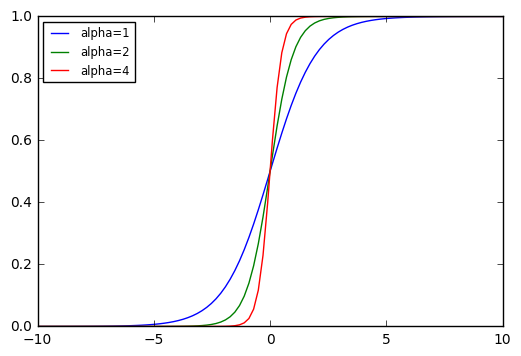

In [19]:
x = np.linspace(-10, 10, 100)
plt.plot(x, sigm(x), label="alpha=1")
plt.plot(x, sigm(2 * x), label="alpha=2")
plt.plot(x, sigm(4 * x), label="alpha=4")
plt.legend(fontsize='small', loc=2)

**Q**: Zašto je sigmoidalna funkcija prikladan izbor za aktivacijsku funkciju poopćenoga linearnog modela? 
</br>

**Q**: Kakav utjecaj ima faktor $\alpha$ na oblik sigmoide? Što to znači za model logističke regresije (tj. kako izlaz modela ovisi o magnitudi vektora težina $\mathbf{w}$)?

#### (b)

Implementirajte funkciju 

> `lr_train(X, y, eta=0.01, max_iter=2000, alpha=0, epsilon=0.0001, trace=False)` 

za treniranje modela logističke regresije gradijentnim spustom (*batch* izvedba). Funkcija uzima označeni skup primjera za učenje (matrica primjera `X` i vektor oznaka `y`) te vraća $(n+1)$-dimenzijski vektor težina tipa `ndarray`. Ako je `trace=True`, funkcija dodatno vraća listu (ili matricu) vektora težina $\mathbf{w}^0,\mathbf{w}^1,\dots,\mathbf{w}^k$ generiranih kroz sve iteracije optimizacije, od 0 do $k$. Optimizaciju treba provoditi dok se ne dosegne `max_iter` iteracija, ili kada razlika u pogrešci unakrsne entropije između dviju iteracija padne ispod vrijednosti `epsilon`. Parametar `alpha` predstavlja faktor regularizacije.

Definirajte pomoćnu funkciju `lr_h(x,w)` koja daje predikciju (izlaz modela) za primjer `x` uz zadane težine `w`.

**NB:** Obratite pozornost na to da je način kako su definirane oznake ($\{+1,-1\}$ ili $\{1,0\}$) kompatibilan s izračunom funkcije gubitka u optimizacijskome algoritmu. Prilagodite algoritam ili jednostavno redefinirajte oznake u skupu `seven`.

In [20]:
seven_y = (seven_y == 1).astype(int)
outlier_y = (outlier_y == 1).astype(int)
unsep_y = (unsep_y == 1).astype(int)

In [21]:
def lr_h(x, w):
    poly = sklearn.preprocessing.PolynomialFeatures(1)
    x = poly.fit_transform(x)
    return sigm(x.dot(w))

def lr_train(X, y, eta=0.01, max_iter=2000, alpha=0, epsilon=0.0001, trace=False):
    N, n = X.shape
    w = np.zeros(n + 1)
    trace_w = []
    current_error = np.inf
    last_error = None
    for iteration in range(max_iter):
        delta_w = np.zeros(w.shape)
        h = lr_h(X, w)
        for i in range(N):
            delta_w[0] = delta_w[0] + (h[i] - y[i])
            delta_w[1:] = delta_w[1:] + (h[i] - y[i]) * X[i]
        w[0] = w[0] - eta * delta_w[0]
        w[1:] = w[1:] * (1 - eta * alpha) - eta * delta_w[1:]
        if trace:
            trace_w.append(np.copy(w))
        last_error = current_error
        current_error = sklearn.metrics.log_loss(y, h)
        if abs(last_error - current_error) < epsilon:
            if trace:
                return (w, trace_w)
            return w
    if trace:
        return (w, trace_w)
    return w

#### (c)

Definirajte funkciju `cross_entropy_error(X,y,w)` koja izračunava pogrešku unakrsne entropije modela na označenom skupu `(X,y)` koristeći dane težine `w`. Možete iskoristiti funkciju [`metrics.log_loss`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.log_loss.html).

In [23]:
def cross_entropy_error(X, y, w):
    return sklearn.metrics.log_loss(y, lr_h(X, w))

#### (d)

Koristeći funkciju `lr_train`, trenirajte model logističke regresije na skupu `seven`, prikažite dobivenu granicu između klasa te  izračunajte pogrešku unakrsne entropije.

cross entropy error: 0.135118952393
[ 4.45707984 -1.71139874  0.68391858]


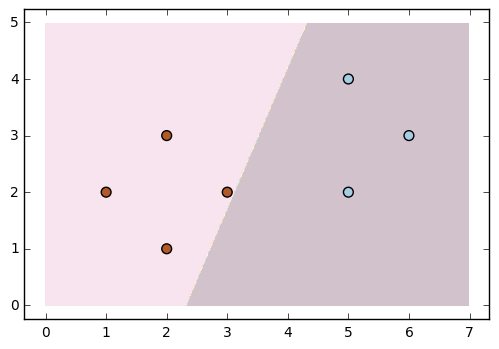

In [24]:
w = lr_train(seven_X, seven_y)
print 'cross entropy error:', cross_entropy_error(seven_X, seven_y, w)
print w
def h(x):
    poly = sklearn.preprocessing.PolynomialFeatures(1)
    x = poly.fit_transform(x)
    return x.dot(w) > 0.5
mlutils.plot_2d_clf_problem(seven_X, seven_y, h)

**Q:** Koji kriterij zaustavljanja je aktiviran?

**Q:** Zašto dobivena pogreška unakrsne entropije nije jednaka nuli?

**Q:** Kako biste utvrdili da je optimizacijski postupak doista pronašao hipotezu koja minimizira pogrešku učenja? O čemu (o kojim parametrima) to ovisi?

**Q:** Na koji način biste preinačili kôd ako biste htjeli da se optimizacija izvodi stohastičkim gradijentnim spustom (*online learning*)?

#### (e)

Prikažite na jednom grafikonu pogrešku unakrsne entropije (očekivanje logističkog gubitka) i pogrešku klasifikacije (očekivanje gubitka 0-1) na skupu `seven` kroz iteracije optimizacijskog postupka. Koristite trag težina funkcije `lr_train` iz zadatka (b) (opcija `trace=True`). Za izračun pogreške možete koristiti funkciju [`metrics.zero_one_loss`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.zero_one_loss.html#sklearn.metrics.zero_one_loss). Na drugom grafikonu prikažite pogrešku unakrsne entropije kao funkciju broja iteracija za različite stope učenja, $\eta\in\{0.005,0.01,0.05,0.1\}$.

In [25]:
from sklearn.metrics import zero_one_loss

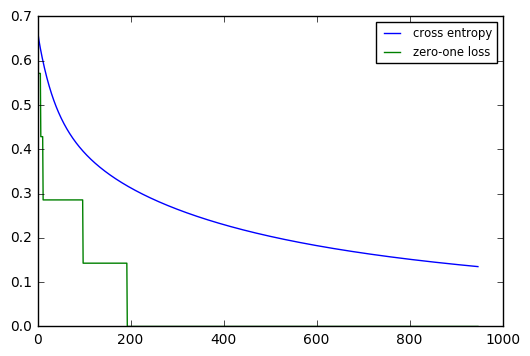

In [26]:
def zero_one_error(X, y, w):
    return zero_one_loss(y, lr_h(X, w) > 0.5)

(w, trace_w) = lr_train(seven_X, seven_y, trace=True)
n = len(trace_w)
cross_entropy = []
zero_one = []
for i in range(n):
    cross_entropy.append(cross_entropy_error(seven_X, seven_y, trace_w[i]))
    zero_one.append(zero_one_error(seven_X, seven_y, trace_w[i]))
plt.plot(range(n), cross_entropy, label='cross entropy')
plt.plot(range(n), zero_one, label='zero-one loss')
plt.legend(fontsize='small')

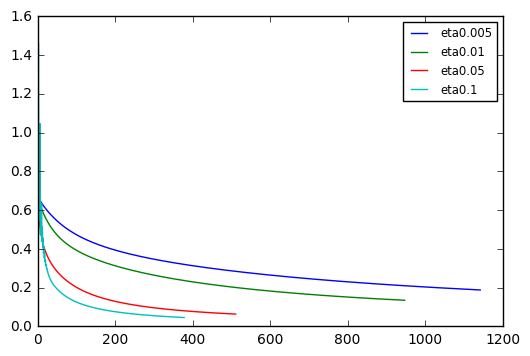

In [27]:
for eta in [0.005, 0.01, 0.05, 0.1]:
    (w, trace_w) = lr_train(seven_X, seven_y, trace=True, eta=eta)
    n = len(trace_w)
    cross_entropy = []
    for i in range(n):
        cross_entropy.append(cross_entropy_error(seven_X, seven_y, trace_w[i]))
    plt.plot(range(n), cross_entropy, label='eta' + str(eta))
plt.legend(fontsize='small')


**Q:** Zašto je pogreška unakrsne entropije veća od pogreške klasifikacije? Je li to uvijek slučaj kod logističke regresije i zašto?

**Q:** Koju stopu učenja $\eta$ biste odabrali i zašto?

#### (f)

Upoznajte se s klasom [`linear_model.LogisticRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) koja implementira logističku regresiju. Usporedite rezultat modela na skupu `seven` s rezultatom koji dobivate pomoću vlastite implementacije algoritma.

**NB:** Kako ugrađena implementacija koristi naprednije načine optimizacije, vrlo je vjerojatno da Vam se rješenja neće poklapati, ali generalne performanse modela bi trebale.

9.99200722163e-16


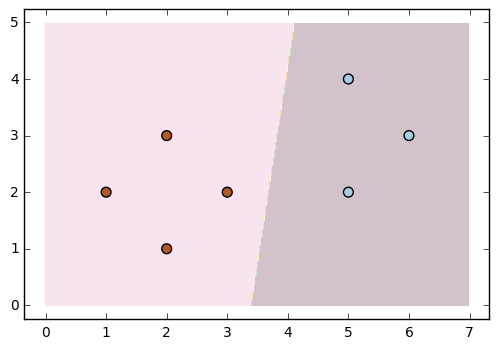

In [37]:
model = sklearn.linear_model.LogisticRegression(max_iter=2000, C=100)
model.fit(seven_X, seven_y)
mlutils.plot_2d_clf_problem(seven_X, seven_y, h=model.predict)
print sklearn.metrics.log_loss(seven_y, model.predict(seven_X))

### 4. Analiza logističke regresije

#### (a)

Provjerite kako se logistička nosi s vrijednostima koje odskaču. Iskoristite skup `outlier` iz prvog zadatka. Prikažite granicu između klasa.

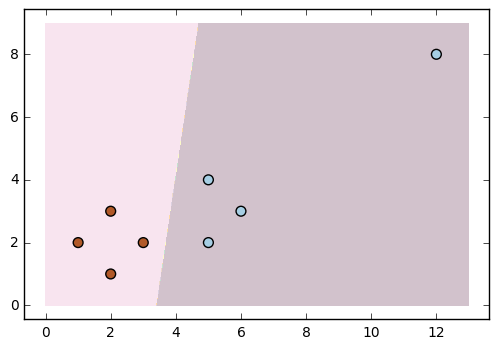

In [38]:
model = sklearn.linear_model.LogisticRegression(C=100)
model.fit(outlier_X, outlier_y)
mlutils.plot_2d_clf_problem(outlier_X, outlier_y, h=model.predict)

**Q:** Zašto se rezultat razlikuje od onog koji je dobio model klasifikacije linearnom regresijom iz prvog zadatka?

#### (b)

Trenirajte model logističke regresije na skupu `seven` te na dva odvojena grafikona prikažite, kroz iteracije optimizacijskoga algoritma, (1) izlaz modela $h(\mathbf{x})$ za svih sedam primjera te (2) vrijednosti težina $w_0$, $w_1$, $w_2$.


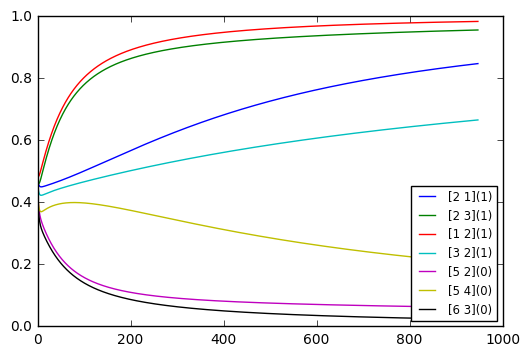

In [39]:
(w, trace_w) = lr_train(seven_X, seven_y, trace=True)
N = seven_X.shape[0]
hx = []
for i in range(N):
    hx.append([])
for w in trace_w:
    tmp = lr_h(seven_X, w)
    for i in range(N):
        hx[i].append(tmp[i])
for i in range(N):
    plt.plot(range(len(trace_w)), hx[i], label=str(seven_X[i]) + '(' + str(seven_y[i]) + ')')
plt.legend(fontsize='small', loc='lower right')

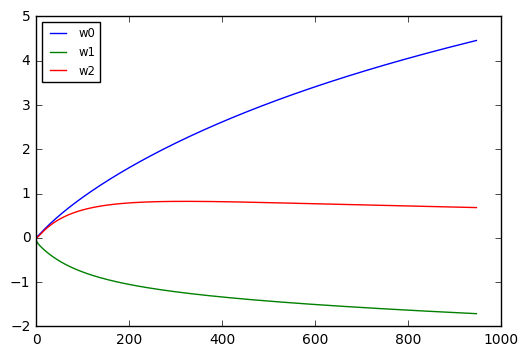

In [40]:
w0, w1, w2 = [], [], []
for w in trace_w:
    w0.append(w[0])
    w1.append(w[1])
    w2.append(w[2])
plt.plot(range(len(trace_w)), w0, label='w0')
plt.plot(range(len(trace_w)), w1, label='w1')
plt.plot(range(len(trace_w)), w2, label='w2')
plt.legend(fontsize='small', loc=2)

#### (c)

Ponovite eksperiment iz podzadatka (b) koristeći linearno neodvojiv skup podataka `unsep` iz prvog zadatka.

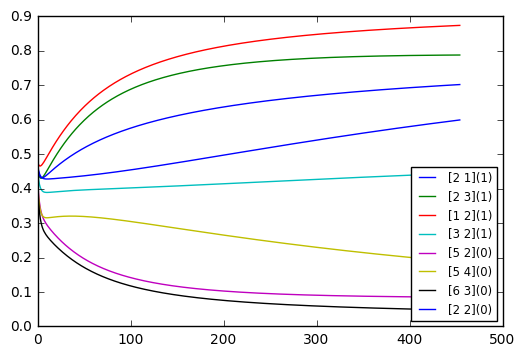

In [41]:
(w, trace_w) = lr_train(unsep_X, unsep_y, trace=True)
N = unsep_X.shape[0]
hx = []
for i in range(N):
    hx.append([])
for w in trace_w:
    tmp = lr_h(unsep_X, w)
    for i in range(N):
        hx[i].append(tmp[i])
for i in range(N):
    plt.plot(range(len(trace_w)), hx[i], label=str(unsep_X[i]) + '(' + str(unsep_y[i]) + ')')
plt.legend(fontsize='small', loc='lower right')

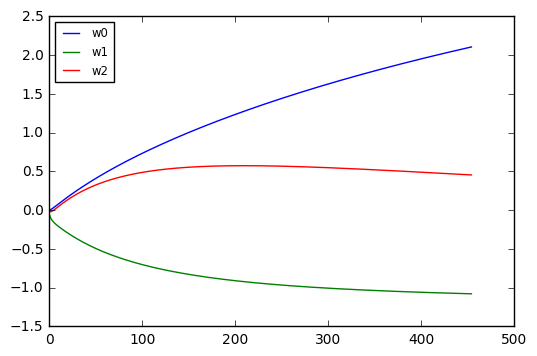

In [42]:
w0, w1, w2 = [], [], []
for w in trace_w:
    w0.append(w[0])
    w1.append(w[1])
    w2.append(w[2])
plt.plot(range(len(trace_w)), w0, label='w0')
plt.plot(range(len(trace_w)), w1, label='w1')
plt.plot(range(len(trace_w)), w2, label='w2')
plt.legend(fontsize='small', loc=2)

**Q:** Usporedite grafikone za slučaj linearno odvojivih i linearno neodvojivih primjera te komentirajte razliku.

### 5. Regularizirana logistička regresija

Trenirajte model logističke regresije na skupu `seven` s različitim faktorima L2-regularizacije, $\alpha\in\{0,1,10,100\}$. Prikažite (1) pogrešku unakrsne entropije te (2) L2-normu vektora $\mathbf{w}$ kroz iteracije optimizacijskog algoritma.

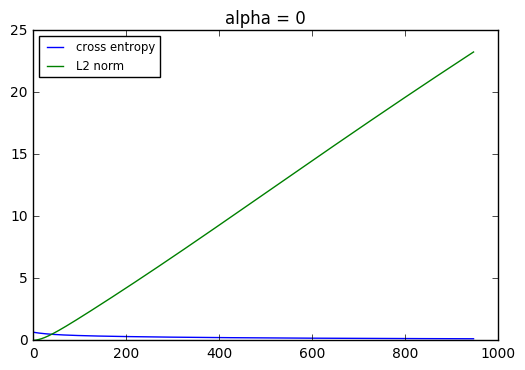

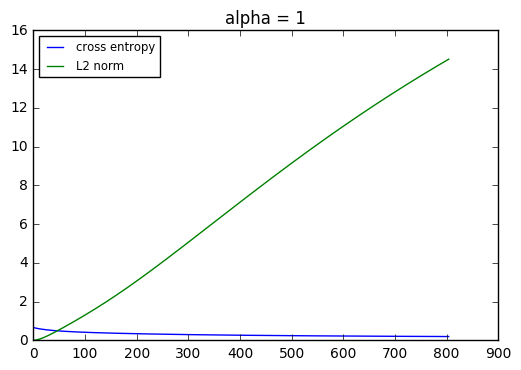

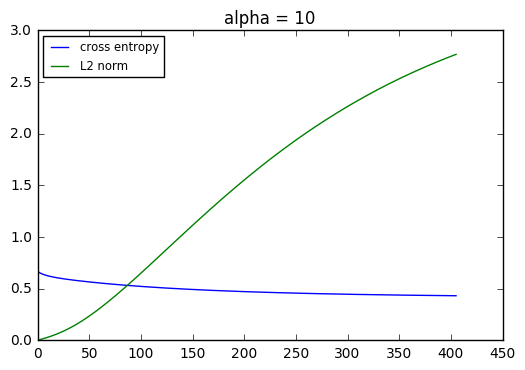

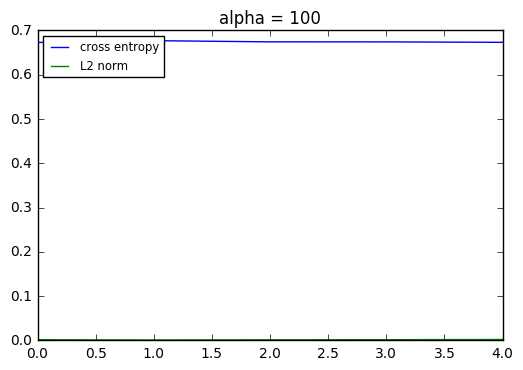

In [46]:
for alpha in [0, 1, 10, 100]:
    (w, trace_w) = lr_train(seven_X, seven_y, alpha=alpha, trace=True)
    cross_entropy = []
    l2_norm = []
    for i in range(len(trace_w)):
        cross_entropy.append(cross_entropy_error(seven_X, seven_y, trace_w[i]))
        l2_norm.append(trace_w[i].dot(trace_w[i]))
    plt.figure()
    plt.plot(range(len(trace_w)), cross_entropy, label='cross entropy')
    plt.plot(range(len(trace_w)), l2_norm, label='L2 norm')
    plt.title('alpha = ' + str(alpha))
    plt.legend(fontsize='small', loc=2)

**Q:** Jesu li izgledi krivulja očekivani i zašto?

**Q:** Koju biste vrijednost za $\alpha$ odabrali i zašto?

### 6. Logistička regresija s funkcijom preslikavanja

#### (a)

Proučite funkciju [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html). Generirajte i prikažite dvoklasan skup podataka s ukupno $N=100$ dvodimenzijskih ($n=2)$ primjera, i to sa dvije grupe po klasi (`n_clusters_per_class=2`). Malo je izgledno da će tako generiran skup biti linearno odvojiv, međutim to nije problem jer primjere možemo preslikati u višedimenzijski prostor značajki pomoću klase [`preprocessing.PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html), kao što smo to učinili kod linearne regresije u drugoj laboratorijskoj vježbi. Trenirajte model logističke regresije koristeći za preslikavanje u prostor značajki polinomijalnu funkciju stupnja $d=2$ i stupnja $d=3$. Prikažite dobivene granice između klasa. Možete koristiti svoju implementaciju, ali se radi brzine preporuča koristiti `linear_model.LogisticRegression`. Regularizacijski faktor odaberite po želji.

**NB:** Kao i ranije, za prikaz granice između klasa koristite funkciju `plot_2d_clf_problem`. Funkciji kao argumente predajte izvorni skup podataka, a preslikavanje u prostor značajki napravite unutar poziva funkcije `h` koja čini predikciju, na sljedeći način:

In [47]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression

#poly = PolynomialFeatures(2)
#...
#mlutils.plot_2d_clf_problem(X, y, lambda x : model.predict(poly.transform(x))

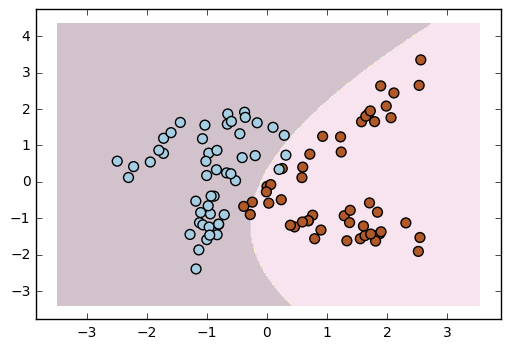

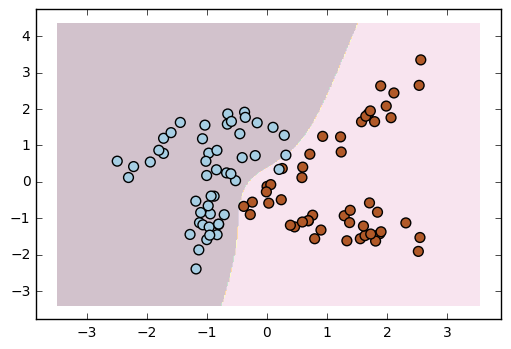

In [48]:
X, y = make_classification(n_features=2, n_redundant=0, n_classes=2, n_clusters_per_class=2)
# d = 2
poly = PolynomialFeatures(2)
X_2 = poly.fit_transform(X)
model = LogisticRegression()
model.fit(X_2, y)
plt.figure()
mlutils.plot_2d_clf_problem(X, y, lambda x : model.predict(poly.fit_transform(x)))
# d = 3
poly = PolynomialFeatures(3)
X_3 = poly.fit_transform(X)
model = LogisticRegression()
model.fit(X_3, y)
plt.figure()
mlutils.plot_2d_clf_problem(X, y, lambda x : model.predict(poly.fit_transform(x)))

**Q:** Koji biste stupanj polinoma upotrijebili i zašto? Je li taj odabir povezan s odabirom regularizacijskog faktora $\alpha$? Zašto?

#### (b)

Podijelite skup podataka iz zadatka (a) na **skup za treniranje** i **skup za ispitivanje** u omjeru 7:3 (možete koristiti funkciju [`cross_validation.train_test_split`](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html). Na skupu za učenje trenirajte model logističke regresije s polinomom četvrtog stupnja ($d=4$) kao funkcijom preslikavanja. Prikažite empirijsku pogrešku i pogrešku generalizacije u ovisnosti o faktoru regularizacije, i to kao funkciju parametra $C$ (inverz faktora regularizacije) za $C=2^\alpha$, gdje $\alpha\in\{-8,-7,\dots,7,8\}$.

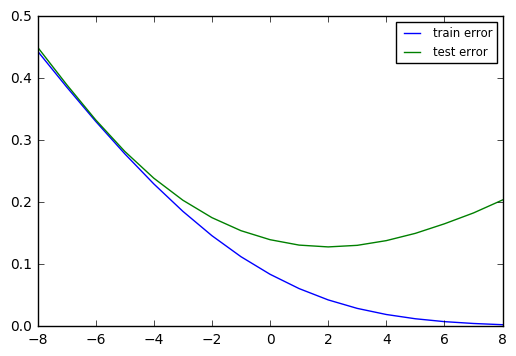

In [54]:
from sklearn import cross_validation
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.3)
poly = PolynomialFeatures(4)
X_4 = poly.fit_transform(X)
C_list = np.power(2.0, np.array(range(-8, 9)))
train_errors = []
test_errors = []
for C in C_list:
    model = LogisticRegression(C=C)
    model.fit(poly.fit_transform(X_train), y_train)
    train_errors.append(sklearn.metrics.log_loss(y_train, model.predict_proba(poly.fit_transform(X_train))))
    test_errors.append(sklearn.metrics.log_loss(y_test, model.predict_proba(poly.fit_transform(X_test))))
plt.plot(range(-8, 9), train_errors, label='train error')
plt.plot(range(-8, 9), test_errors, label='test error')
plt.legend(fontsize='small')

**Q:** Kojem dijelu u grafikonu odgovara prenaučenost, a kojem podnaučenost? Zašto?

**Q:** Koji biste faktor $\alpha$ odabrali i zašto?